<a href="https://colab.research.google.com/github/AmiraliLalehpour/MMAI-823-Final-Project/blob/main/Finance_Project_Gurashish_Juneja_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from spacy.lang.en import English

In [ ]:
# SentAnalysis imports
import warnings
warnings.filterwarnings('ignore')
import re
import datetime
from nltk import word_tokenize, corpus
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import os

import plotly.express as px

import string
import spacy
from collections import defaultdict

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
nlp = English()
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
current_directory = os.getcwd()
print(current_directory)

/content


In [ ]:
path = "/content/drive/MyDrive/Finance Project/reddit_wsb.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
#File has been loaded successfully

EDA

In [ ]:
data = df

In [ ]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1611862661,NaN,2021-01-28 21:37,NaN,NaN,NaN,NaN
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1611862330,NaN,2021-01-28 21:32,NaN,NaN,NaN,NaN
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1611862235,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30,NaN,NaN,NaN,NaN
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1611862137,NaN,2021-01-28 21:28,NaN,NaN,NaN,NaN
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1611862016,NaN,2021-01-28 21:26,NaN,NaN,NaN,NaN


In [ ]:
#We see that the last 4 columns add no value to the dataset, hence will be deleting them.
data.drop(data.columns[-4:],axis = 1,inplace= True)

In [ ]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1611862661,NaN,2021-01-28 21:37
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1611862330,NaN,2021-01-28 21:32
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1611862235,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1611862137,NaN,2021-01-28 21:28
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1611862016,NaN,2021-01-28 21:26


In [ ]:
#Much better

In [ ]:
data.shape

(53512, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53512 entries, 0 to 53511
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      53349 non-null  object
 1   score      53281 non-null  object
 2   id         53258 non-null  object
 3   url        53244 non-null  object
 4   comms_num  53225 non-null  object
 5   created    53215 non-null  object
 6   body       24759 non-null  object
 7   timestamp  53184 non-null  object
dtypes: object(8)
memory usage: 3.3+ MB


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

In [ ]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1611862661,NaN,2021-01-28 21:37:00
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1611862330,NaN,2021-01-28 21:32:00
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1611862235,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:00
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1611862137,NaN,2021-01-28 21:28:00
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1611862016,NaN,2021-01-28 21:26:00


In [ ]:
#Let's find the range of values in the timestamp column

earliest_date = data["timestamp"].min()

latest_date = data["timestamp"].max()

In [ ]:
#Print the range of data values in the "timestamp" column:

print("Range of data values in the 'timestampt' column:")

print("Earliest Date:",earliest_date )
print("Latest Date:", latest_date)

Range of data values in the 'timestampt' column:
Earliest Date: 2020-09-29 03:46:00
Latest Date: 2021-08-16 09:26:00


In [ ]:
# We can see that the first entry was on September 29, 2020, while the last entry was on the 16th of August, 2021.

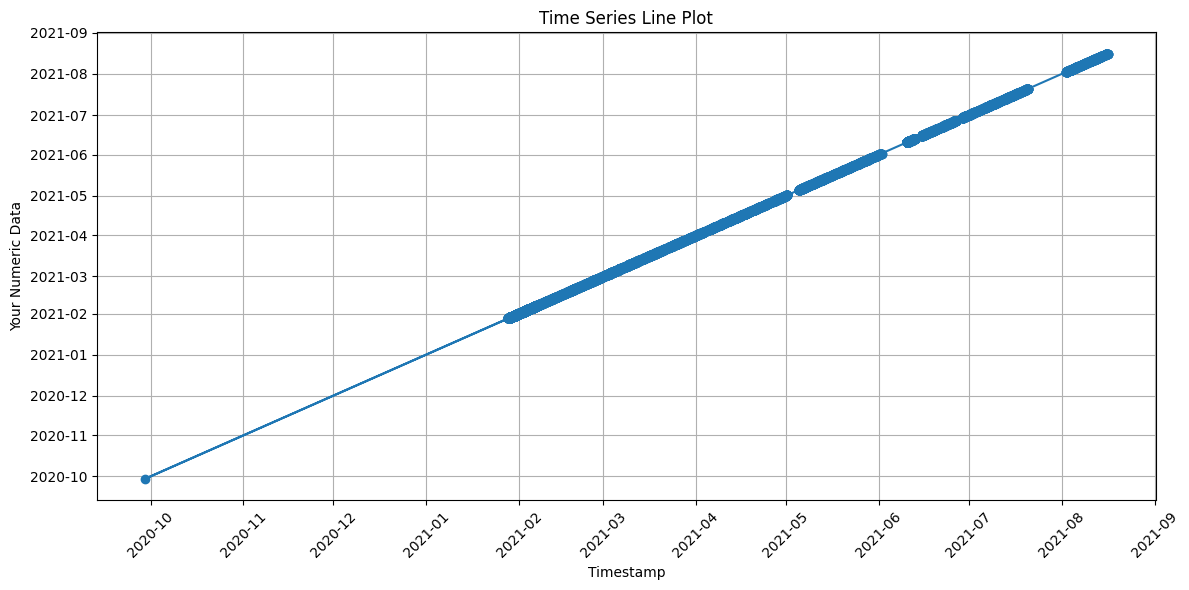

In [ ]:
# Create a line plot of the 'timestamp' column
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.plot(data['timestamp'], data['timestamp'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Your Numeric Data')  # Replace 'Your Numeric Data' with the column you want to visualize
plt.title('Time Series Line Plot')
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# We can clearly see that most of the entries have taken place after January 2021.

In [ ]:
entries_in_2020 = data[data["timestamp"].dt.year==2020]

In [ ]:
entries_in_2020

,title,score,id,url,comms_num,created,body,timestamp
32620,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,https://www.reddit.com/r/wallstreetbets/commen...,11,1601340416,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:00


In [ ]:
#Only one entry in 2020

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
#Visualizing text using wordcloud (for title and body columns)

data["combined_text"] = data["title"].fillna("") + " " + data["body"].fillna("")

In [ ]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp,combined_text
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1611862661,NaN,2021-01-28 21:37:00,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1611862330,NaN,2021-01-28 21:32:00,Math Professor Scott Steiner says the numbers ...
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1611862235,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:00,Exit the system The CEO of NASDAQ pushed to ha...
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1611862137,NaN,2021-01-28 21:28:00,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1611862016,NaN,2021-01-28 21:26:00,"Not to distract from GME, just thought our AMC..."


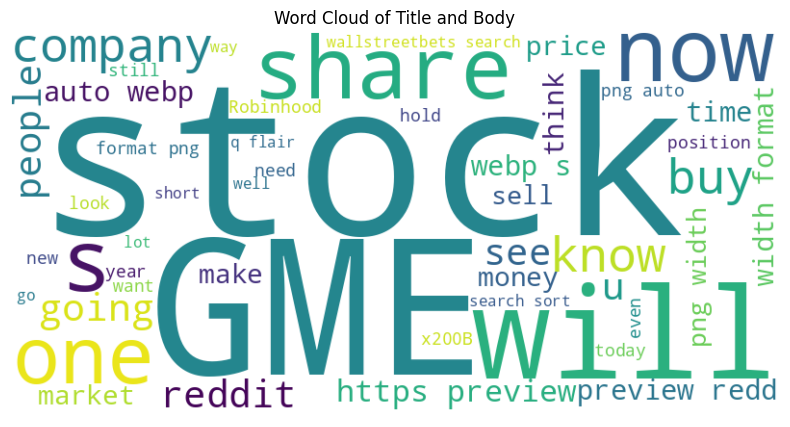

In [ ]:
# Create a WordCloud for the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(" ".join(data['combined_text']))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title and Body')
plt.show()

In [ ]:
#Right away, we can see that GME stands out. I can;t even see AMC

In [ ]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp,combined_text
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1611862661,NaN,2021-01-28 21:37:00,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1611862330,NaN,2021-01-28 21:32:00,Math Professor Scott Steiner says the numbers ...
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1611862235,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:00,Exit the system The CEO of NASDAQ pushed to ha...
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1611862137,NaN,2021-01-28 21:28:00,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1611862016,NaN,2021-01-28 21:26:00,"Not to distract from GME, just thought our AMC..."


Data Preprocessing

In [ ]:

# Convert 'score' column to numeric
data['score'] = pd.to_numeric(data['score'], errors = "coerce")

data.head()


,title,score,id,url,comms_num,created,body,timestamp,combined_text
0,"It's not about the money, it's about sending a...",55.0,l6ulcx,https://v.redd.it/6j75regs72e61,6,1611862661,NaN,2021-01-28 21:37:00,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...,110.0,l6uibd,https://v.redd.it/ah50lyny62e61,23,1611862330,NaN,2021-01-28 21:32:00,Math Professor Scott Steiner says the numbers ...
2,Exit the system,0.0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1611862235,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:00,Exit the system The CEO of NASDAQ pushed to ha...
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29.0,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1611862137,NaN,2021-01-28 21:28:00,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC...",71.0,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1611862016,NaN,2021-01-28 21:26:00,"Not to distract from GME, just thought our AMC..."


In [ ]:
data.drop_duplicates(inplace=True)

def detect_outliers(data, column, threshold=3):
    # Define your outlier detection logic
    # Example using z-score
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    return data[abs(z_scores) < threshold]

In [ ]:
data = detect_outliers(data, 'score')

In [ ]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp,combined_text
0,"It's not about the money, it's about sending a...",55.0,l6ulcx,https://v.redd.it/6j75regs72e61,6,1611862661,NaN,2021-01-28 21:37:00,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...,110.0,l6uibd,https://v.redd.it/ah50lyny62e61,23,1611862330,NaN,2021-01-28 21:32:00,Math Professor Scott Steiner says the numbers ...
2,Exit the system,0.0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1611862235,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:00,Exit the system The CEO of NASDAQ pushed to ha...
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29.0,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1611862137,NaN,2021-01-28 21:28:00,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC...",71.0,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1611862016,NaN,2021-01-28 21:26:00,"Not to distract from GME, just thought our AMC..."


In [ ]:
data.shape

(52430, 9)

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[["score", "comms_num"]] = scaler.fit_transform(data[["score","comms_num"]])

In [ ]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp,combined_text
0,"It's not about the money, it's about sending a...",-0.234762,l6ulcx,https://v.redd.it/6j75regs72e61,-0.094876,1611862661,NaN,2021-01-28 21:37:00,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...,-0.211118,l6uibd,https://v.redd.it/ah50lyny62e61,-0.086817,1611862330,NaN,2021-01-28 21:32:00,Math Professor Scott Steiner says the numbers ...
2,Exit the system,-0.258406,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,-0.075440,1611862235,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:00,Exit the system The CEO of NASDAQ pushed to ha...
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,-0.245939,l6ugk6,https://sec.report/Document/0001193125-21-019848/,-0.062641,1611862137,NaN,2021-01-28 21:28:00,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC...",-0.227884,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,-0.023769,1611862016,NaN,2021-01-28 21:26:00,"Not to distract from GME, just thought our AMC..."


In [ ]:
#Text Preprocessing
import re

def text_preprocessing(text):
    if pd.notnull(text):  # Check if the value is not null (not NaN)
        # Remove URLs
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        text = url_pattern.sub(r'', text)

        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans("", "", string.punctuation))

        # Tokenize text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words("english"))
        tokens = [token for token in tokens if token not in stop_words]

        # Remove spaces
        tokens = [token.strip() for token in tokens]

        # Remove numbers
        tokens = [token for token in tokens if not token.isdigit()]

        # Lemmatize tokens
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Join tokens back to text
        text = ' '.join(tokens)
    return text



In [ ]:
data["body"] = data["body"].apply(text_preprocessing)
data["title"] = data["title"].apply(text_preprocessing)
data["combined_text"] = data["combined_text"].apply(text_preprocessing)


In [ ]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp,combined_text
0,money sending message 🚀💎🙌,-0.234762,l6ulcx,https://v.redd.it/6j75regs72e61,-0.094876,1611862661,NaN,2021-01-28 21:37:00,money sending message 🚀💎🙌
1,math professor scott steiner say number spell ...,-0.211118,l6uibd,https://v.redd.it/ah50lyny62e61,-0.086817,1611862330,NaN,2021-01-28 21:32:00,math professor scott steiner say number spell ...
2,exit system,-0.258406,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,-0.075440,1611862235,ceo nasdaq pushed halt trading “ give investor...,2021-01-28 21:30:00,exit system ceo nasdaq pushed halt trading “ g...
3,new sec filing gme someone le retarded please ...,-0.245939,l6ugk6,https://sec.report/Document/0001193125-21-019848/,-0.062641,1611862137,NaN,2021-01-28 21:28:00,new sec filing gme someone le retarded please ...
4,distract gme thought amc brother aware,-0.227884,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,-0.023769,1611862016,NaN,2021-01-28 21:26:00,distract gme thought amc brother aware


In [ ]:
data.drop("body", axis=1, inplace=True)

In [ ]:
data.head()

,title,score,id,url,comms_num,created,timestamp,combined_text
0,money sending message 🚀💎🙌,-0.234762,l6ulcx,https://v.redd.it/6j75regs72e61,-0.094876,1611862661,2021-01-28 21:37:00,money sending message 🚀💎🙌
1,math professor scott steiner say number spell ...,-0.211118,l6uibd,https://v.redd.it/ah50lyny62e61,-0.086817,1611862330,2021-01-28 21:32:00,math professor scott steiner say number spell ...
2,exit system,-0.258406,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,-0.075440,1611862235,2021-01-28 21:30:00,exit system ceo nasdaq pushed halt trading “ g...
3,new sec filing gme someone le retarded please ...,-0.245939,l6ugk6,https://sec.report/Document/0001193125-21-019848/,-0.062641,1611862137,2021-01-28 21:28:00,new sec filing gme someone le retarded please ...
4,distract gme thought amc brother aware,-0.227884,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,-0.023769,1611862016,2021-01-28 21:26:00,distract gme thought amc brother aware


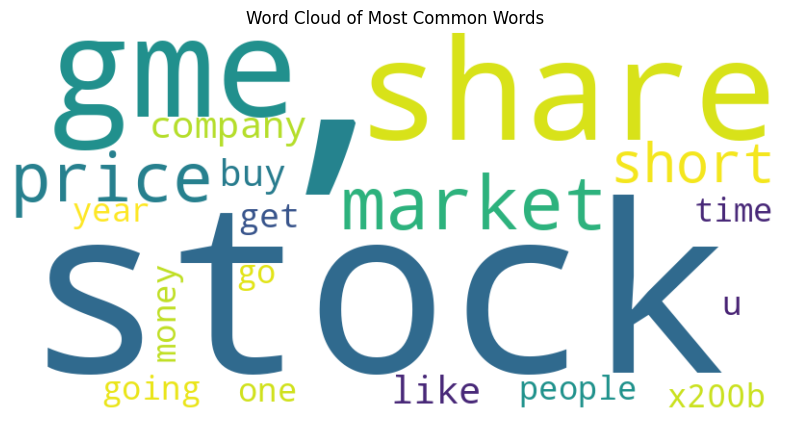

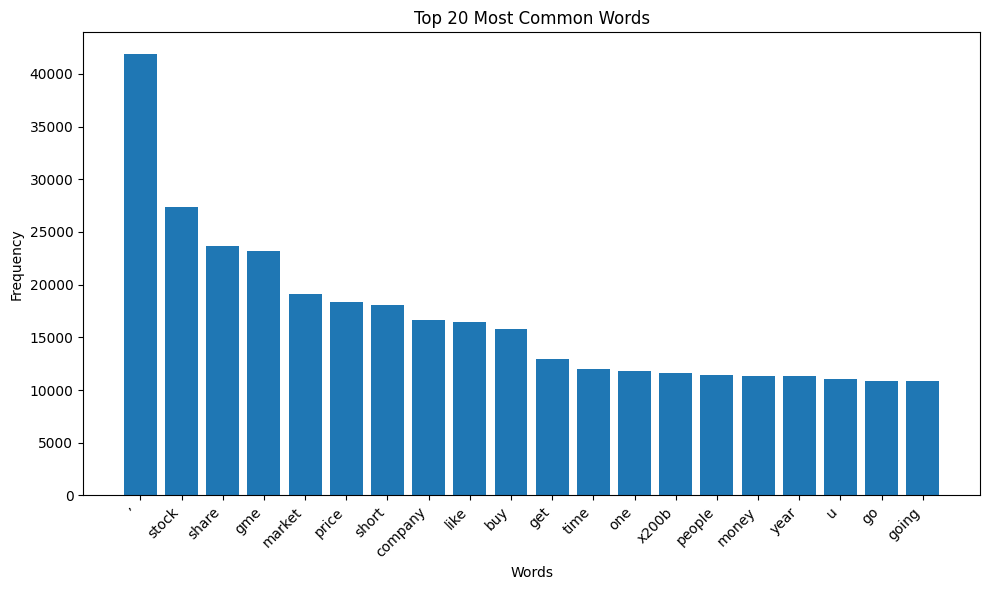

In [ ]:
from collections import Counter

# Function to get the most common words and their frequencies
def get_most_common_words(text_column, n=10):
    all_words = ' '.join(text_column).split()
    word_count = Counter(all_words)
    most_common_words = word_count.most_common(n)
    return dict(most_common_words)

# Get the top 20 most common words in the 'combined_text' column
most_common_words = get_most_common_words(data['combined_text'], n=20)

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(most_common_words.keys(), most_common_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

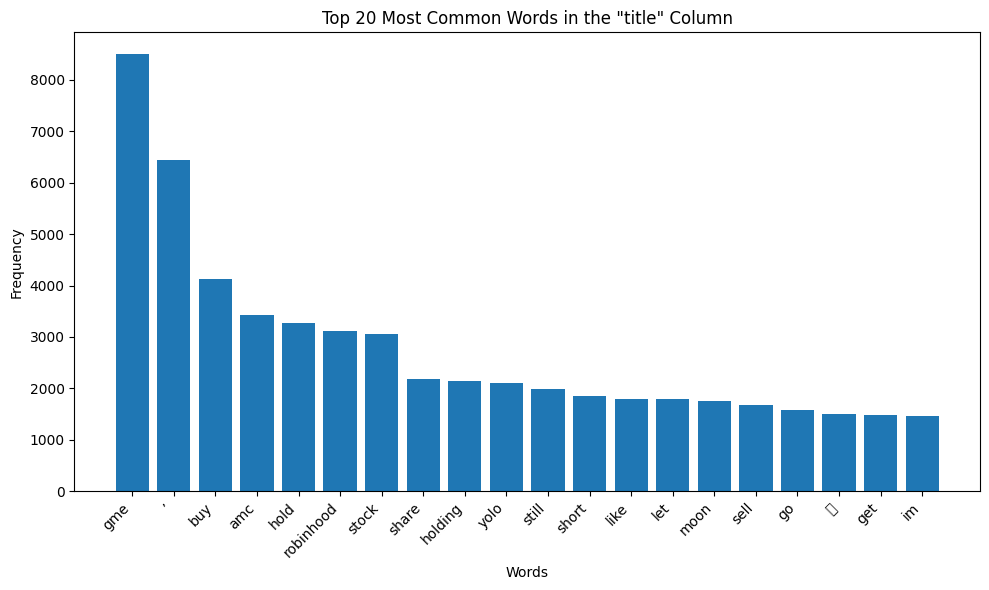

In [ ]:
# Count the occurrences of each word in the 'title' column
word_count = Counter(' '.join(data['title']).split())

# Get the 20 most common words and their frequencies
most_common_words = word_count.most_common(20)

# Plotting the frequency distribution as a bar chart
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in the "title" Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


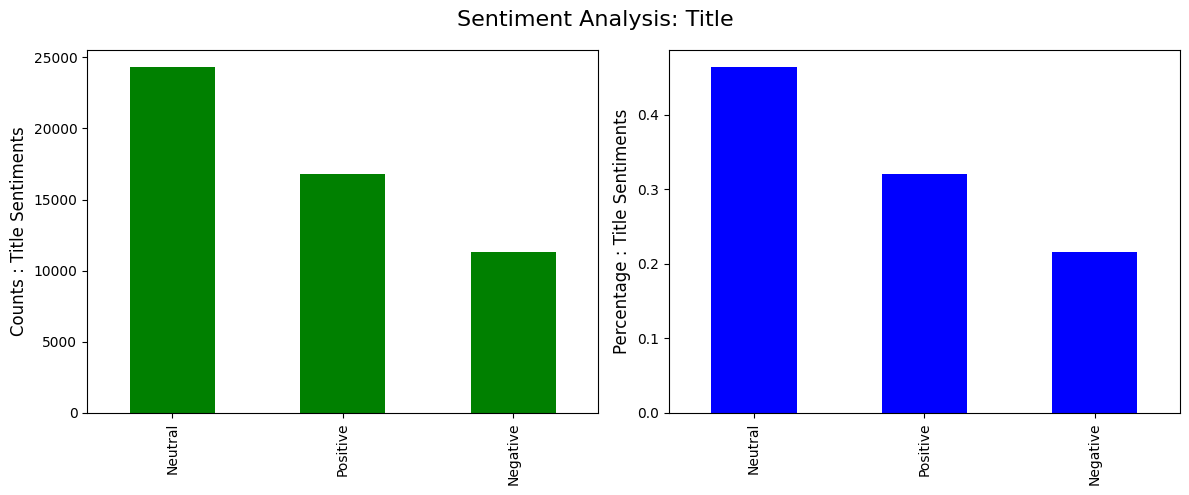

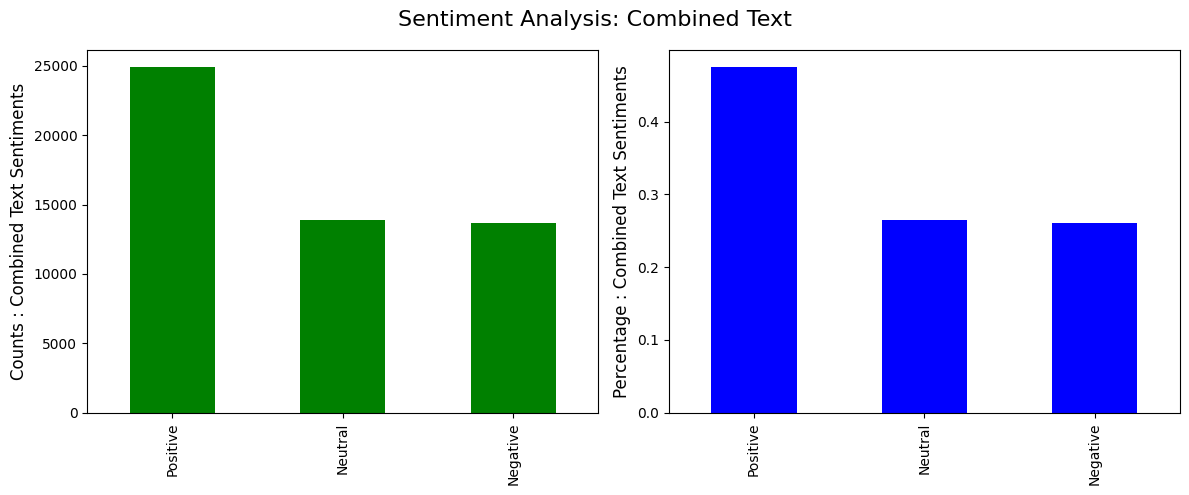

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('vader_lexicon')


# Function to perform sentiment analysis and return sentiment polarity
def get_sentiment(text):
    if pd.notnull(text):  # Check if the value is not null (not NaN)
        sia = SentimentIntensityAnalyzer()
        analysis = sia.polarity_scores(text)
        return analysis['compound']
    return 0  # Return 0 for missing or empty text

# Perform sentiment analysis on 'title' column
data['title_sentiment'] = data['title'].apply(get_sentiment)

# Perform sentiment analysis on 'combined_text' column
data['combined_text_sentiment'] = data['combined_text'].apply(get_sentiment)

# Function to classify sentiment based on compound score
def classify_sentiment(compound_score, pos_threshold=0.05, neg_threshold=-0.05):
    if compound_score >= pos_threshold:
        return 'Positive'
    elif compound_score <= neg_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Classify overall sentiment based on compound score
data['title_overall_sentiment'] = data['title_sentiment'].apply(classify_sentiment)
data['combined_text_overall_sentiment'] = data['combined_text_sentiment'].apply(classify_sentiment)

# Function to plot sentiment distribution
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts / sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} Sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} Sentiments', size=12)
    plt.suptitle(f"Sentiment Analysis: {title}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot sentiment distribution for 'title' and 'combined_text'
plot_sentiment(data, 'title_overall_sentiment', 'Title')
plot_sentiment(data, 'combined_text_overall_sentiment', 'Combined Text')


In [ ]:
data.head()

,title,score,id,url,comms_num,created,timestamp,combined_text,title_sentiment,combined_text_sentiment,title_overall_sentiment,combined_text_overall_sentiment
0,money sending message 🚀💎🙌,-0.234762,l6ulcx,https://v.redd.it/6j75regs72e61,-0.094876,1611862661,2021-01-28 21:37:00,money sending message 🚀💎🙌,0.0000,0.0000,Neutral,Neutral
1,math professor scott steiner say number spell ...,-0.211118,l6uibd,https://v.redd.it/ah50lyny62e61,-0.086817,1611862330,2021-01-28 21:32:00,math professor scott steiner say number spell ...,-0.5859,-0.5859,Negative,Negative
2,exit system,-0.258406,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,-0.075440,1611862235,2021-01-28 21:30:00,exit system ceo nasdaq pushed halt trading “ g...,0.0000,0.4215,Neutral,Positive
3,new sec filing gme someone le retarded please ...,-0.245939,l6ugk6,https://sec.report/Document/0001193125-21-019848/,-0.062641,1611862137,2021-01-28 21:28:00,new sec filing gme someone le retarded please ...,-0.3400,-0.3400,Negative,Negative
4,distract gme thought amc brother aware,-0.227884,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,-0.023769,1611862016,2021-01-28 21:26:00,distract gme thought amc brother aware,-0.2960,-0.2960,Negative,Negative


In [ ]:
data.to_csv("output.csv", index= False)